In [112]:
from utils.RunConcatenateExperiment import RunConcatenateExperiment

from models.UrlsEmbedding import Clustering_algorithm, Scale

%matplotlib inline

In [113]:
direct = "/Volumes/AdditionalDriveMAC/Google Drive/1) Tesi/Sperimentazioni/"

site = "cs.stanford.edu" # cs.illinois.edu  cs.ox.ac.uk  cs.priceton.edu  cs.stanford.edu
type_site = "NoConstraint" # ListConstraint  NoConstraint

db_best_left_with_b = "1000000" # 100000 = 100K ; 500000 = 500K ; 1000000 = 1M
window_best_left_with_b = "5" # 2 3 5 7
depth_best_left_with_b = "10" # 10 15 20
iteractions_left_with_b = "3" # 50 10 3
                 
db_best_normal = "500000" # 100000 = 100K ; 500000 = 500K ; 1000000 = 1M
window_best_normal = "2" # 2 3 5 7
depth_best_normal = "20" # 10 15 20
iteractions_normal = "10" # 50 10 3

use_tfidf = True
dimension_deduction = 100

clustering = Clustering_algorithm.HDBscan
intersect = True
                 
scaling = Scale.l2
separator = "\t"

In [114]:
%time e = RunConcatenateExperiment(direct, site, type_site, db_best_left_with_b, window_best_left_with_b, depth_best_left_with_b, iteractions_left_with_b, db_best_normal, window_best_normal, depth_best_normal, iteractions_normal, clustering, use_tfidf, int(dimension_deduction), separator, scaling, intersect)

scaling embeddings with L2 normalization
scaling embeddings with L2 normalization
use tfidf
Fitting tfidf...


Create tf-idf matrix, shape:  (436, 949)
Performing lsa dimensional reduction with dimension=100


Dimensionality reduction with lsa, shape:  (436, 100)
scaling embeddings with L2 normalization
Intersecting...
Original urls: 167
Intersected urls: 159
Original urls: 159
Intersected urls: 159
Concatenating...
Start running HDBscan
Start running HDBscan
Homogeneity: 0.15936692906
Completeness: 0.505591846062
V-Measure core: 0.242344707309
Adjusted Rand index: 0.0559413296841911
Mutual Information: 0.118299139968
Silhouette: -0.0376166182711
Homogeneity: 0.430269187205
Completeness: 0.542442244789
V-Measure core: 0.479887818924
Adjusted Rand index: 0.18691402421474482
Mutual Information: 0.371083114315
Silhouette: -0.0475541704359
CPU times: user 5.4 s, sys: 154 ms, total: 5.55 s
Wall time: 5.57 s


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:193: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 159 but corresponding boolean dimension is 138
  a = np.mean(distances_row[mask])
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:219: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 159 but corresponding boolean dimension is 138
  for cur_label in set(labels) if not cur_label == label])


In [115]:
print("Metrics WITH B VALUE")

e.get_dataframe_left_with_b_doc2vec()

Metrics WITH B VALUE


,Adj Mutual info,Adj Rand index,Completeness,Homogeneity,Silhouette,V-Measure
HDBScan,0.12,0.06,0.51,0.16,-0.04,0.24


In [116]:
print("Metrics NORMAL")

e.get_dataframe_normal_doc2vec()

Metrics NORMAL


,Adj Mutual info,Adj Rand index,Completeness,Homogeneity,Silhouette,V-Measure
HDBScan,0.37,0.19,0.54,0.43,-0.05,0.48


normal_TFIDF


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

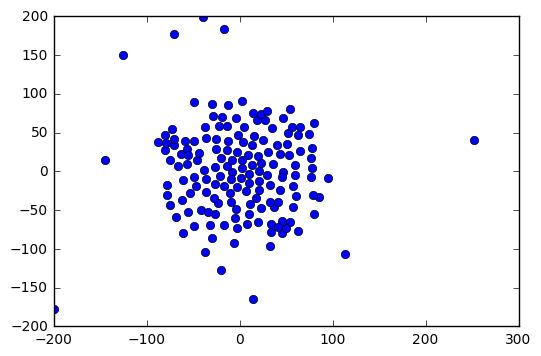

In [117]:
direct = direct + site + "/" + type_site + "/"
if use_tfidf:
    string = "TFIDF"
else:
    string = "doc2vec"

print("normal_" + string)

e.plot_normalized_normal_doc2vec(direct + "normal_" + string + "_" + clustering.value)

left_with_b_TFIDF


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

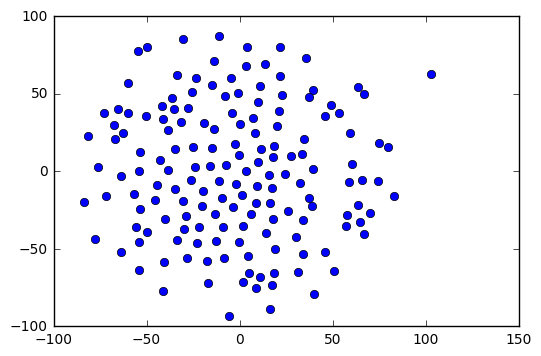

In [118]:
print("left_with_b_" + string)

e.plot_normalized_left_with_b_doc2vec(direct + "left_with_b_" + string + "_" + clustering.value)